# Examen-data-analyst-3-20

#### Etude complète du dataset de la société Dream Housing Finance qui comme nombreuses entreprises s'occupe de toutes sortes de prêts immobiliers.

## Objectif de cette étude

L'entreprise souhaite automatiser le processus d'éligibilité au prêt (en temps réel) en fonction des informations sur le client fournies lors du remplissage du formulaire de demande en ligne.

L'entreprise est présente dans toutes les zones urbaines, semi-urbaines et rurales. Le client demande d'abord un prêt immobilier, puis cette société valide l'éligibilité du client au prêt.
les détails du client sont le sexe, l'état matrimonial, l'éducation, le nombre de personnes à charge, le revenu, le montant du prêt, les antécédents de crédit et autres.

Pour automatiser ce processus, ils ont fourni un ensemble de données permettant d'identifier les segments de clients éligibles au montant du prêt afin de pouvoir cibler spécifiquement ces clients. 

NB: L'etude de ce dataset est une competition encore actif, disponible vis à ce lien : https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement

## Pourquoi le choix de ce dataset

Nous avons choisi ce dataset parce que nombreux sont ces entreprises de notre sous-region qui s'attardent encore sur ce processus traditionnel. En automatisant cette tache cela rendra plus simple l'etude de dossier des emprunters

## Resumé de la tache à accomplir
Analyser et Prédire l'admissibilité au prêt pour la société Dream Housing Finance

## Dictionnaire de données

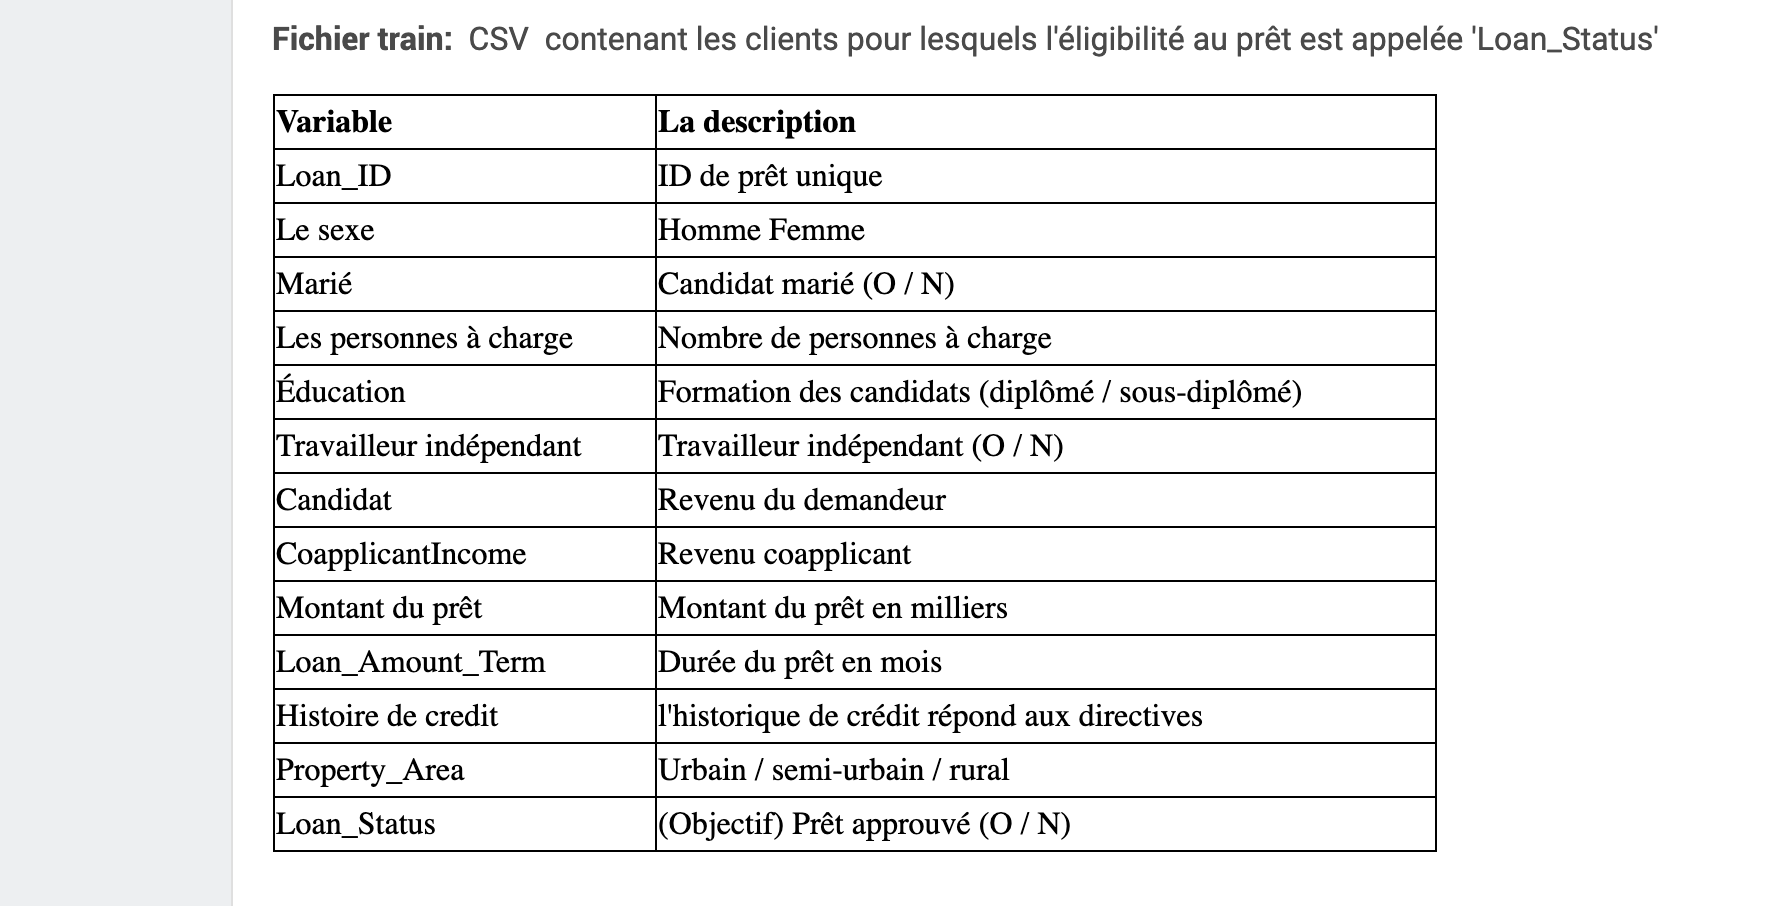

## Analyse du dataset

### importer les librairies 

In [2]:
# lirairies de manipulation et de calcule
import pandas as pd
import numpy as np
import scipy.stats as stats

# Librairies de visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignorer les messages d'avertissement
import warnings
warnings.filterwarnings("ignore")

### Analyse de la forme de notre train set

il s'agira ici de voir :
- la dimension du train set, 
- les noms des colonnes du train set, 
- le nombre de valeurs manquantes du train set
- les types de variable dont dispose notre train set
- et les statistique descriptives des variables continue

In [4]:
# Importer le dataset ( Il s'agit du train set celui qui va nous permetre d'etudier et entrainer notre model )
train_data = pd.read_csv('train_pret.csv')

In [5]:
# Afficher l'en-tête du dataset pour voir a quoi ressemble notre jeu de données
train_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# Voir la dimension de notre train set
print('le train set contient {} lignes et {} colonnes. '.format(train_data.shape[0], train_data.shape[1]))

le train set contient 614 lignes et 13 colonnes. 


In [10]:
# voir le nom des colonnes de no dataset
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
# information sur les types de valeurs dans nos colonnes 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
# nombre de variable en fonction du type de données
train_data.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [18]:
# Pourcentage de valeur manquante dans chaque colonne
round((train_data.isna().sum()*100)/len(train_data),2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [21]:
# statistique descritive des colonnes avec des valeurs continues
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


Au terme ce cette etude de forme on constate que :
- le train set contient 614 lignes et 13 colonnes
- le dataset contient 8 colonne de type object , 4 colonne de type float64 et une colone de type int64 
- le pourcentage de valeur manquante par colonne le plus élévé est de 8% ce qui n'est pas grave


### Etude des Variables Categorielles

L'ojectif est de comprendre unpeu plus nos données categorielle et voir leurs influence sur la variale Loan_Status (variable qu'on veut predire)

In [243]:
# faire une copy de dataset avant une etude profonde
df = train_data.copy()

In [244]:
# supression de la variable Loan_ID qui est unitile dans notre etude
df.drop('Loan_ID',axis=1, inplace=True)

In [26]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


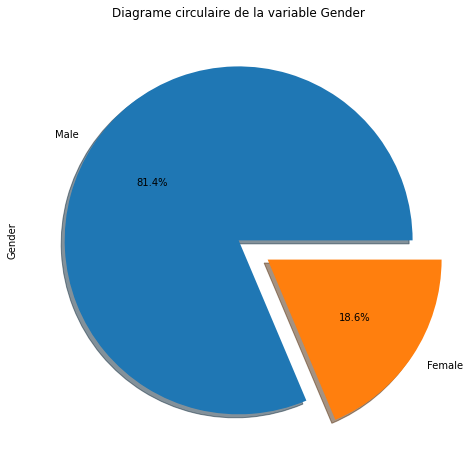

In [32]:
# Representation de la distribution de la variable gender
plt.figure(figsize=(12,8))
plt.title('Diagrame circulaire de la variable Gender')
ax = df.Gender.value_counts().plot(kind='pie', autopct='%1.1f%%',
                              explode=(0.0, 0.2), shadow=True)

On peut constater que plus de 81% de personne de notre trainset sont des Hommes puis 18,4% de femme

In [33]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

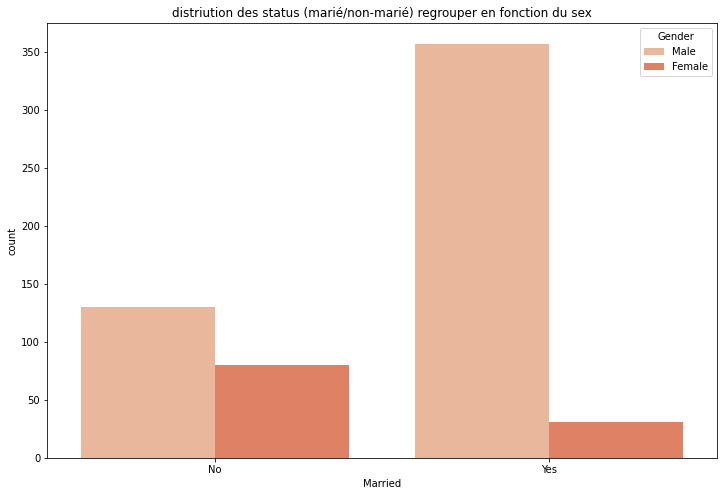

In [47]:
# histogramme des status matrimonial des personnes
plt.figure(figsize=(12,8))
plt.title('distriution des status (marié/non-marié) regrouper en fonction du sex')
p =sns.color_palette("rocket_r")
ax = sns.countplot('Married', hue ='Gender' ,data= df ,palette=p)

On peut voir que le nombre d'homme marié depasse largement celui des femmes mariées et en ce concerne les non marié les hommes depasse unpeu plus que les femmes normal vue que 81% des personnes sont des hommes.


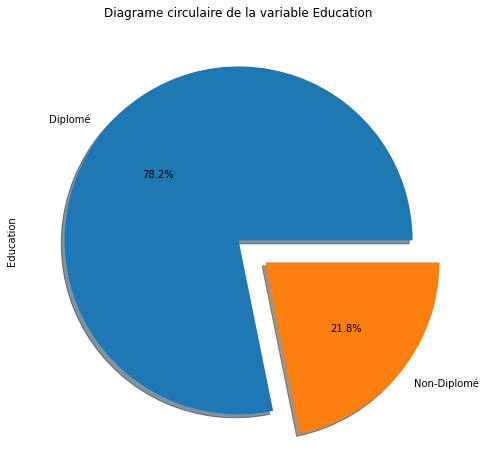

In [59]:
# Representation de la distribution de la variable education
plt.figure(figsize=(12,8))

plt.title('Diagrame circulaire de la variable Education')
ax = df.Education.value_counts().plot(kind='pie', autopct='%1.1f%%',
                              explode=(0.0, 0.2), shadow=True, labels=['Diplomé', 'Non-Diplomé'])

On peut constater que plus de 78 % de personne de notre trainset sont diplomé juste 21,8% n'ont aucun diplome

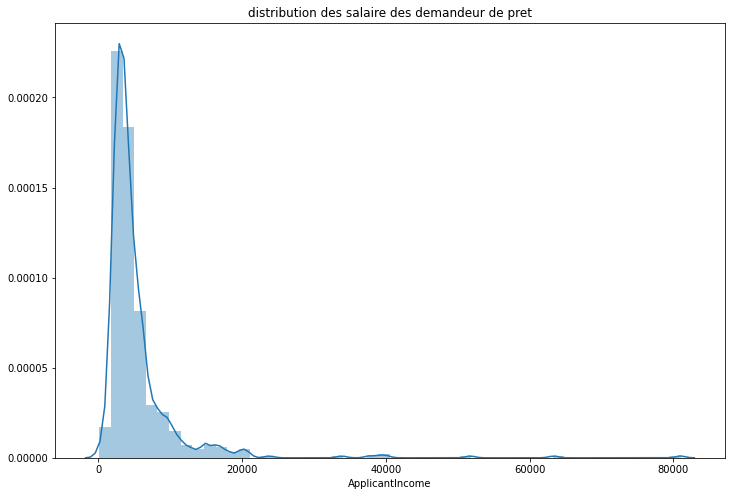

In [255]:
# variable des salaire des demandeur de pret

plt.figure(figsize=(12,8))

plt.title('distribution des salaire des demandeur de pret')
ax =sns.distplot(df['ApplicantIncome'])

On remarque une distribution plus ou moins normale avec une pente entre 2000 et 12000 Dollars comme salaire puis un applatissement au niveaude 20000 Dollars.

In [258]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

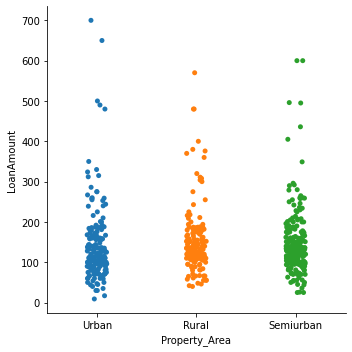

In [261]:
sns.catplot(x="Property_Area", y="LoanAmount", data=df)

il y'a une distribution plus ou moins similaire dans les differentes environemment. avec une concentration de demande entre 50 et 240 milles dollars.

## Analyse de la Target Variable 

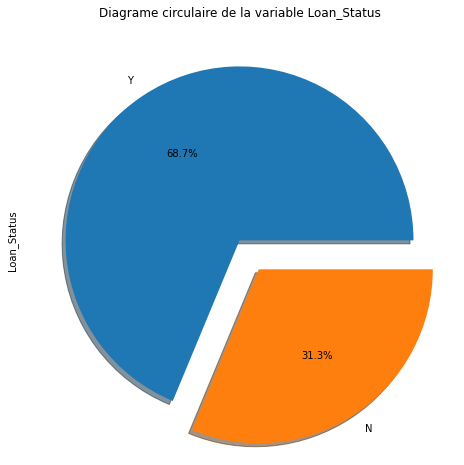

In [250]:
plt.figure(figsize=(12,8))

plt.title('Diagrame circulaire de la variable Loan_Status')
ax = df['Loan_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                              explode=(0.0, 0.2), shadow=True)

On peut voir que plus de 68% des personnes de notre dataset sont apte pour un pret.


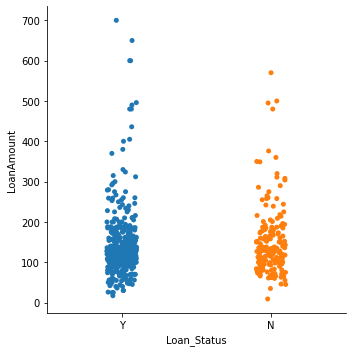

In [266]:
# distribution de la target en fonction de la somme de pret
ax = sns.catplot(x="Loan_Status", y="LoanAmount", data=df)

on peut voir que la distribution est plus ou moins similaire entre les deux camps. 

Donc la colonne Loan_Status n'influence pas vraiment le status de pret

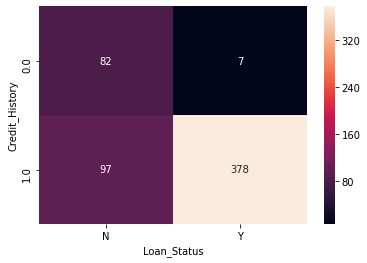

In [276]:
# crosstab de variable Credit_History et Loan_Status
ax =sns.heatmap(pd.crosstab(df['Credit_History'], df['Loan_Status']), annot=True, fmt='d')

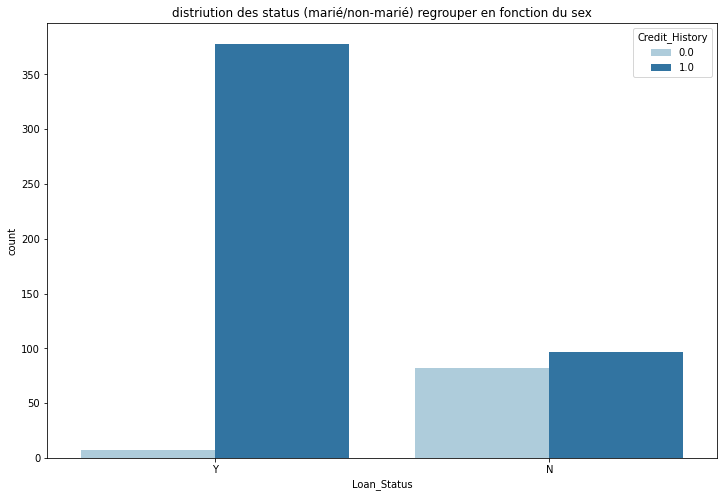

In [268]:
# histogramme des status de pret des personnes
plt.figure(figsize=(12,8))
plt.title('distriution des status (marié/non-marié) regrouper en fonction du sex')
p =sns.color_palette("Paired")
ax = sns.countplot('Loan_Status', hue ='Credit_History' ,data= df ,palette=p)

Ici la difference est claire  plus de 95% des personne apte a un pret avait deja emprunter dans le passé

## features ingeneering

C'est dans cette étape qu'on va preparer nos données pour le machine learning.
elle consiste à :
- transformer les varaible categorielle en numeric (faire l'encodeage )
- Normaliser les données (les variables continue) pour eviter les mauvaises predictions
- selectionnées les variables qui influence la target variable ( Loan_Status)

In [95]:
# Remplacer les valeurs manquantes du dataset

df.Gender.fillna('Male',inplace=True)
df.Married.fillna('Yes', inplace=True)
df.Dependents.fillna(0, inplace =True)
df.Self_Employed.fillna('No', inplace=True)
df.LoanAmount.fillna(146.41, inplace=True)
df.Loan_Amount_Term.fillna(360, inplace=True)
df.Credit_History.fillna(1.0, inplace=True)
df_cor = df.copy()

Ici nous avons remplacés les valeurs manquantes par le mode de chaque colonne (le mode c'est la valeur qui apparait le plus dans la colonne)

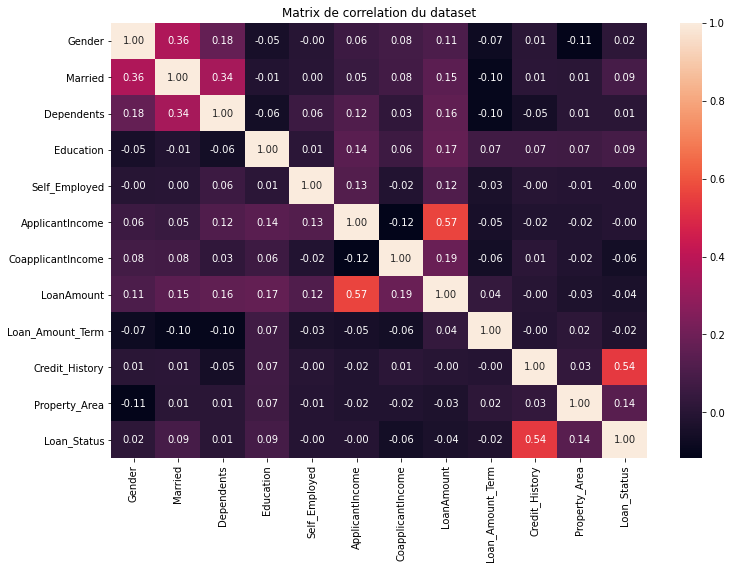

In [96]:
# Copier et transformer nos valeur pour etalir notre matrix de correlation

df_cor['Gender']= df['Gender'].map({'Male':1, 'Female':0})
df_cor['Married']= df['Married'].map({'Yes':1, 'No':0})
df_cor['Education']= df['Education'].map({'Graduate':1, 'Not Graduate':0})
df_cor['Self_Employed']= df['Self_Employed'].map({'Yes':1, 'No':0})
df_cor['Loan_Status']= df['Loan_Status'].map({'Y':1, 'N':0})
df_cor['Property_Area']= df['Property_Area'].map({'Urban':1, 'Rural':0})
df_cor['Property_Area']= df['Property_Area'].map({'Urban':1, 'Rural':0, 'Semiurban':2})
df_cor['Dependents']= df['Dependents'].map({'1':1, '0':0, '2':2, '3+':3})

plt.figure(figsize=(12,8))
plt.title('Matrix de correlation du dataset')
ax = sns.heatmap(df_cor.corr(),annot=True, fmt= '.2f')

on peux constater que les variable continue n'ont pas d'influence sur notre target variable , on remarque que leurs  correlations ont des  valeurs neagtives. 
la feature variable Credit_History a une tres bonne correlation avec notre target variable ( Loan_Status).

In [97]:
# Suprimer les colonnes avec des correlation negative avec la target variable
df.drop(['Loan_Amount_Term','LoanAmount','CoapplicantIncome','ApplicantIncome','Dependents']
        ,axis=1,inplace=True)

# separer les features et la target variable
X = df.drop('Loan_Status', axis=1)

y= df['Loan_Status']

# Transformer le type des variable object en category
cols =['Gender','Married', 'Education','Self_Employed','Credit_History','Property_Area']

for c in cols:
    X[c] =X[c].astype('category')

# Encodage des variables
X = pd.get_dummies(X, drop_first=False)
y = y.map({'Y':1, 'N':0})


In [98]:

X.head(5)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,1,0,0,1,0,0,1
1,0,1,0,1,1,0,1,0,0,1,1,0,0
2,0,1,0,1,1,0,0,1,0,1,0,0,1
3,0,1,0,1,0,1,1,0,0,1,0,0,1
4,0,1,1,0,1,0,1,0,0,1,0,0,1


In [99]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

# Machine Learning pour la Prediction

c'est dans cette partie que nous allons utilisé nos données pour entrainner notre model de prediction.

on va tester plusieurs models pour voir lequelle a une bonne precision pour notre prediction

In [100]:
# librairies pour le machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report , accuracy_score, f1_score, confusion_matrix, precision_score

In [197]:
# diviser le trainset pour entrainer et tester notre model

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.30)

In [190]:
X_train.shape

(429, 13)

## Model RandomForestClassifier

In [131]:
rfc= RandomForestClassifier(random_state=12)

param_grid_rfc = { 
    'n_estimators': [10,100,200, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=12,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [134]:
# le meilleur hyperparametre du model sur ce trainset

CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 10}

In [174]:
rfc1=RandomForestClassifier(random_state=12, max_features='auto', n_estimators=100, max_depth=4, criterion='gini')
rfc1.fit(X_train, y_train)

# predire le x_val
pred=rfc1.predict(X_val)

In [175]:
# Score de precision du model
accuracy_score(y_val, pred)

0.7945945945945946

## Model Support Vector Machine (SVM)

In [198]:
# utiliser SVC

param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['poly', 'rbf']}  
  
CV_svc = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=10) 
  
# fitting the model for grid search 
CV_svc.fit(X_train, y_train) 

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.818, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.814, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.814, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.814, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.814, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.721, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.837, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.860, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.744, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.744, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.814, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.810, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.690, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] .

[CV] ............ C=1, gamma=1, kernel=rbf, score=0.810, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.690, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.818, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.814, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.860, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.837, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.860, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] .

[CV] .......... C=10, gamma=1, kernel=poly, score=0.698, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.767, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.786, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.690, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.818, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.814, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.837, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.837, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.860, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.744, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.744, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.814, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.833, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.690, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] .

[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.814, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.860, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.837, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.860, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.744, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.744, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.814, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    2.2s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [199]:
# Afficher les meilleurs hyperparametres
print(CV_svc.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}


In [200]:
svc_class = SVC(C= 1, gamma= 0.1, kernel= 'poly')
svc_class.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [201]:
# prediction avec X_val
y_pred2 = svc_class.predict(X_val)

In [202]:
# confusion de matrice pour voir le nombre de valeurs mal predires
confusion_matrix(y_val, y_pred2)

array([[ 23,  28],
       [  4, 130]])

In [203]:
# Precision du model SVC
accuracy_score(y_val, y_pred2)

0.827027027027027

# Model KNeighborsClassifier

In [204]:
range_k = range(1,17)
scores = {}
scores_list = []
for k in range_k:
   KNN_clas = KNeighborsClassifier(n_neighbors=k)
   KNN_clas.fit(X_train, y_train)
   y_pred = KNN_clas.predict(X_val)
   scores[k] = accuracy_score(y_val,y_pred)
   scores_list.append(accuracy_score(y_val,y_pred))
resultat = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(resultat)
resultat_rep = classification_report(y_val, y_pred)
print("Classification Report:")
print (resultat_rep)

Confusion Matrix:
[[ 18  33]
 [  2 132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.35      0.51        51
           1       0.80      0.99      0.88       134

    accuracy                           0.81       185
   macro avg       0.85      0.67      0.69       185
weighted avg       0.83      0.81      0.78       185



In [207]:
# Score de precision maximale après l'entrainement

scores_list


[0.6162162162162163,
 0.5675675675675675,
 0.7513513513513513,
 0.6594594594594595,
 0.8162162162162162,
 0.7945945945945946,
 0.7945945945945946,
 0.7945945945945946,
 0.8162162162162162,
 0.8216216216216217,
 0.8162162162162162,
 0.8054054054054054,
 0.8162162162162162,
 0.8162162162162162,
 0.8108108108108109,
 0.8108108108108109]

Text(0, 0.5, 'Accuracy')

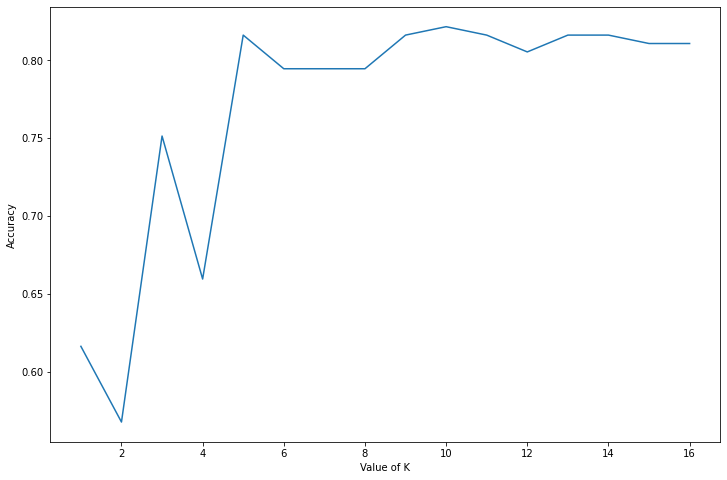

In [206]:
# graph des scores obtenue pendant l'entrainement
plt.figure(figsize=(12,8))
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [208]:
# utilisons le model avec les meilleurs hyperparametres
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [209]:
import pickle
from joblib import dump, load

# On va enregistrer notre model dans un fichier classifier_pret.pkl
with open('classifier_pret.pkl', 'wb') as model_file:
  pickle.dump(classifier, model_file)

In [210]:
# Ici on peut importer notre model de prediction  

classifier = load('classifier_pret.pkl')

In [228]:
# importer le test set pour faire notre prediction
test_data = pd.read_csv('test_pret.csv')
test_index = test_data['Loan_ID']

In [229]:
# Prediction de data set du test mais avant le transformer avec cette fonction
def transf_test(df):
    df.drop(['Loan_Amount_Term','LoanAmount','CoapplicantIncome','ApplicantIncome','Dependents','Loan_ID']
            ,axis=1,inplace=True)


    # Transformer le type des variable object en category
    cols =['Gender','Married', 'Education','Self_Employed','Credit_History','Property_Area']

    for c in cols:
        df[c] =df[c].astype('category')

    # Encodage des variables
    X = pd.get_dummies(df, drop_first=False)
    
    return X


In [230]:
test_data = transf_test(test_data)

In [231]:
test_data.head(5)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,1,0,1,0,0,1,0,0,1
1,0,1,0,1,1,0,1,0,0,1,0,0,1
2,0,1,0,1,1,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,1,0,0,0,0,0,1
4,0,1,1,0,0,1,1,0,0,1,0,0,1


In [232]:
y_test= classifier.predict(test_data)

In [233]:
# prediction du test set avec 82% de precision
y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

## Conclusion

En resumé nous avons faire une analyse complète des differentes caracteristiques des clients qui influencent status pour pouvoir prendre un pret au niveau de la société Dream Housing Finance .  puis nous avons resortir un model de prediction qui a une precision de 82,14 % avec le model de KNeighborsClassifier .
